<a href="https://colab.research.google.com/github/taciturn02/CreditCardFruadDetection/blob/main/ML_MODELS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
from google.colab import drive

In [95]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix,f1_score,roc_auc_score
from sklearn.model_selection import KFold,cross_val_score



In [97]:
train_df = pd.read_csv("/content/drive/MyDrive/CreditCard_DataSet/Dataset_For_Smote.csv")


In [98]:
train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  int64  
 1   category    555719 non-null  int64  
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  int64  
 4   zip         555719 non-null  int64  
 5   lat         555719 non-null  float64
 6   long        555719 non-null  float64
 7   city_pop    555719 non-null  int64  
 8   job         555719 non-null  int64  
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
 12  hour        555719 non-null  int64  
 13  day         555719 non-null  int64  
 14  month       555719 non-null  int64  
 15  age_cust    555719 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 67.8 MB


##Synthetic Minority Oversampling Technique (SMOTE)

In [99]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=42)
XX = train_df.drop(columns='is_fraud', axis=1)
YY = train_df['is_fraud']
XS, YS = smote.fit_resample(XX, YY)

In [100]:
YY.value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [101]:
YS.value_counts()

is_fraud
0    553574
1    553574
Name: count, dtype: int64

In [102]:
YS


0          0
1          0
2          0
3          0
4          0
          ..
1107143    1
1107144    1
1107145    1
1107146    1
1107147    1
Name: is_fraud, Length: 1107148, dtype: int64

In [103]:
XS

,merchant,category,amt,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,hour,day,month,age_cust
0,319,10,2.860000,1,29209,33.965900,-80.935500,333497,275,33.986391,-81.200714,12,3,6,52
1,591,10,29.840000,0,84002,40.320700,-110.436000,302,392,39.450498,-109.960431,12,3,6,30
2,611,5,41.280000,0,11710,40.672900,-73.536500,34496,259,40.495810,-74.196111,12,3,6,50
3,222,9,60.050000,1,32780,28.569700,-80.819100,54767,407,28.812398,-80.883061,12,3,6,33
4,292,13,3.190000,1,49632,44.252900,-85.017000,1126,196,44.959148,-85.884734,12,3,6,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107143,550,6,207.777889,1,24433,38.420700,-79.462900,99,110,38.998909,-79.778687,9,1,7,34
1107144,273,6,706.413468,1,59542,48.832800,-108.396100,192,197,48.109967,-107.960137,23,1,10,56
1107145,293,2,14.100830,1,13413,42.944843,-75.465709,1976,352,42.721610,-75.756950,1,5,10,70
1107146,240,3,165.910696,1,48034,42.496900,-83.291100,75830,148,42.860469,-83.114075,2,4,9,46


Split data into target and features

In [104]:
from sklearn.preprocessing import MinMaxScaler


In [105]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(XS)


In [106]:
X_scaled.mean(axis=0)

array([0.49573065, 0.50565368, 0.01303775, 0.44866359, 0.47741569,
       0.41064774, 0.77087183, 0.02635378, 0.49597148, 0.41448097,
       0.7653611 , 0.57904069, 0.47378926, 0.55207931, 0.40318325])

In [107]:
X_scaled

array([[4.60982659e-01, 7.69230769e-01, 8.16967986e-05, ...,
        5.00000000e-01, 0.00000000e+00, 4.56790123e-01],
       [8.54046243e-01, 7.69230769e-01, 1.26673961e-03, ...,
        5.00000000e-01, 0.00000000e+00, 1.85185185e-01],
       [8.82947977e-01, 3.84615385e-01, 1.76921884e-03, ...,
        5.00000000e-01, 0.00000000e+00, 4.32098765e-01],
       ...,
       [4.23410405e-01, 1.53846154e-01, 5.75427880e-04, ...,
        8.33333333e-01, 6.66666667e-01, 6.79012346e-01],
       [3.46820809e-01, 2.30769231e-01, 7.24337414e-03, ...,
        6.66666667e-01, 5.00000000e-01, 3.82716049e-01],
       [4.29190751e-01, 6.15384615e-01, 3.61257062e-02, ...,
        0.00000000e+00, 6.66666667e-01, 7.53086420e-01]])

In [108]:
X_df= pd.DataFrame(X_scaled, columns=XS.columns)


In [109]:
norm_data =  pd.concat([X_df,YS], axis=1)

In [110]:
norm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107148 entries, 0 to 1107147
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1107148 non-null  float64
 1   category    1107148 non-null  float64
 2   amt         1107148 non-null  float64
 3   gender      1107148 non-null  float64
 4   zip         1107148 non-null  float64
 5   lat         1107148 non-null  float64
 6   long        1107148 non-null  float64
 7   city_pop    1107148 non-null  float64
 8   job         1107148 non-null  float64
 9   merch_lat   1107148 non-null  float64
 10  merch_long  1107148 non-null  float64
 11  hour        1107148 non-null  float64
 12  day         1107148 non-null  float64
 13  month       1107148 non-null  float64
 14  age_cust    1107148 non-null  float64
 15  is_fraud    1107148 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 135.2 MB


In [111]:
legit = norm_data[norm_data.is_fraud == 0]
fraud = norm_data[norm_data.is_fraud == 1]

In [112]:
legit_undersample =  legit.sample(n=100000)
fraud_undersample = fraud.sample(n=100000)

In [113]:
randomUndersampled_data = pd.concat([legit_undersample,fraud_undersample],axis = 0)

In [114]:
randomUndersampled_data["is_fraud"].value_counts()

is_fraud
0    100000
1    100000
Name: count, dtype: int64

In [115]:
X = randomUndersampled_data.drop(columns='is_fraud', axis=1)
Y = randomUndersampled_data['is_fraud']

Initalize K-Fold Cross Validation

In [116]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [117]:
metrics = {
    'accuracy': accuracy_score,
    'precision': precision_score,
    'f1_macro' : f1_score,
    'recall': recall_score,
    'roc_auc': roc_auc_score,

}

In [118]:
def model_testing1(estimator):
    ## Prediction on data
    y_preds = estimator.predict(X_test)

    ##Print accuracy score
    print("Accuracy Score on UnderSampled Test Data: ",accuracy_score(Y_test,y_preds))

    ## Print classification report
    print("\nConfussion Matrix  of UnderSampled Test Data:\n " ,confusion_matrix(Y_test ,y_preds),"\n")

    ## Check confusion matrix
    print("classification_report of UnderSampled Test Data: \n\n",classification_report(Y_test ,y_preds))


In [119]:
def model_testing11(estimator):
    ## Prediction on data
    y_preds = estimator.predict(X_train)

    ##Print accuracy score
    print("Accuracy Score on UnderSampled Train Data: ",accuracy_score(Y_train,y_preds))

    ## Print classification report
    print("\nConfussion Matrix  of UnderSampled Train Data:\n " ,confusion_matrix(Y_train ,y_preds),"\n")

    ## Check confusion matrix
    print("classification_report of UnderSampled Train Data: \n\n",classification_report(Y_train ,y_preds))

In [164]:
accuracy = {}
precision = {}
recal = {}
f1_score = {}


##LOGISTIC REGRESSION

In [226]:
model = LogisticRegression(max_iter=1000)


In [227]:
evaluation_results = {}
for metric_name, metric_func in metrics.items():
    scores = cross_val_score(model, X, Y, cv=kfold, scoring=metric_name)
    evaluation_results[metric_name] = scores.mean()

MODEL EVALUATION

In [228]:
for metric_name, score in evaluation_results.items():
    print(f"Mean_{metric_name.capitalize()}: {score}\n")


Mean_Accuracy: 0.8502449999999999

Mean_Precision: 0.929245997328521

Mean_F1_macro: 0.848957957918682

Mean_Recall: 0.7581966727447125

Mean_Roc_auc: 0.9031002934394025



In [229]:
accuracy['Logistic Regression'] = evaluation_results['accuracy']
precision['Logistic Regression'] = evaluation_results['precision']
recal['Logistic Regression'] = evaluation_results['recall']
f1_score['Logistic Regression'] = evaluation_results['f1_macro']


Printing Metrics for the best Fold




In [230]:
accuracy_scores = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
best_fold_index = np.argmax(accuracy_scores)


 Get the train and test indices for the best fold

In [231]:
train_index, test_index = list(kfold.split(X))[best_fold_index]


 Split the data into train and test sets for the best fold


In [232]:
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [233]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [234]:
model_testing1(model)


Accuracy Score on UnderSampled Test Data:  0.852525

Confussion Matrix  of UnderSampled Test Data:
  [[18797  1196]
 [ 4703 15304]] 

classification_report of UnderSampled Test Data: 

               precision    recall  f1-score   support

           0       0.80      0.94      0.86     19993
           1       0.93      0.76      0.84     20007

    accuracy                           0.85     40000
   macro avg       0.86      0.85      0.85     40000
weighted avg       0.86      0.85      0.85     40000



In [235]:
model_testing11(model)

Accuracy Score on UnderSampled Train Data:  0.8492375

Confussion Matrix  of UnderSampled Train Data:
  [[75335  4672]
 [19450 60543]] 

classification_report of UnderSampled Train Data: 

               precision    recall  f1-score   support

           0       0.79      0.94      0.86     80007
           1       0.93      0.76      0.83     79993

    accuracy                           0.85    160000
   macro avg       0.86      0.85      0.85    160000
weighted avg       0.86      0.85      0.85    160000



##DECISION TREE MODEL

In [132]:
from sklearn.tree import DecisionTreeClassifier


In [133]:

model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 10,random_state=42)

In [134]:
evaluation_results = {}
for metric_name, metric_func in metrics.items():
    scores = cross_val_score(model, X, Y, cv=kfold, scoring=metric_name)
    evaluation_results[metric_name] = scores.mean()

In [172]:
accuracy['Decision Tree'] = evaluation_results['accuracy']
precision['Decision Tree'] = evaluation_results['precision']
recal['Decision Tree'] = evaluation_results['recall']
f1_score['Decision Tree'] = evaluation_results['f1_macro']

Model Evaluation

In [135]:
for metric_name, score in evaluation_results.items():
    print(f"Mean_{metric_name.capitalize()}: {score}\n")

Mean_Accuracy: 0.92642

Mean_Precision: 0.9567139037829128

Mean_F1_macro: 0.9263358536504878

Mean_Recall: 0.8932937784888809

Mean_Roc_auc: 0.9748787560663666



Printing metrices for the best fold

In [136]:
accuracy_scores = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
best_fold_index = np.argmax(accuracy_scores)

Get the train and test indices for the best fold

In [140]:
train_index, test_index = list(kfold.split(X))[best_fold_index]

Split the data into train and test sets for the best fold

In [141]:
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [142]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [143]:
model_testing1(model)

Accuracy Score on UnderSampled Test Data:  0.9276

Confussion Matrix  of UnderSampled Test Data:
  [[19333   660]
 [ 2236 17771]] 

classification_report of UnderSampled Test Data: 

               precision    recall  f1-score   support

           0       0.90      0.97      0.93     19993
           1       0.96      0.89      0.92     20007

    accuracy                           0.93     40000
   macro avg       0.93      0.93      0.93     40000
weighted avg       0.93      0.93      0.93     40000



In [144]:
model_testing11(model)

Accuracy Score on UnderSampled Train Data:  0.9299375

Confussion Matrix  of UnderSampled Train Data:
  [[77720  2287]
 [ 8923 71070]] 

classification_report of UnderSampled Train Data: 

               precision    recall  f1-score   support

           0       0.90      0.97      0.93     80007
           1       0.97      0.89      0.93     79993

    accuracy                           0.93    160000
   macro avg       0.93      0.93      0.93    160000
weighted avg       0.93      0.93      0.93    160000



##RANDOM FOREST MODEL

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
model = RandomForestClassifier(criterion = 'entropy',max_depth=14,random_state=42)


In [147]:
evaluation_results = {}
for metric_name, metric_func in metrics.items():
    scores = cross_val_score(model, X, Y, cv=kfold, scoring=metric_name)
    evaluation_results[metric_name] = scores.mean()

In [148]:
for metric_name, score in evaluation_results.items():
    print(f"Mean_{metric_name.capitalize()}: {score}\n")

Mean_Accuracy: 0.91652

Mean_Precision: 0.9744922763470136

Mean_F1_macro: 0.9162025540493307

Mean_Recall: 0.8554134445378698

Mean_Roc_auc: 0.9877414432816416



Printing metrices for the best fold

In [149]:
accuracy_scores = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
best_fold_index = np.argmax(accuracy_scores)

In [171]:
accuracy['Random Forest'] = evaluation_results['accuracy']
precision['Random Forest'] = evaluation_results['precision']
recal['Random Forest'] = evaluation_results['recall']
f1_score['Random Forest'] = evaluation_results['f1_macro']

Get the train and test indices for the best fold

In [150]:
train_index, test_index = list(kfold.split(X))[best_fold_index]

Split the data into train and test sets for the best fold

In [152]:
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [153]:
model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)

In [154]:
model_testing1(model)

Accuracy Score on UnderSampled Test Data:  0.920875

Confussion Matrix  of UnderSampled Test Data:
  [[19574   419]
 [ 2746 17261]] 

classification_report of UnderSampled Test Data: 

               precision    recall  f1-score   support

           0       0.88      0.98      0.93     19993
           1       0.98      0.86      0.92     20007

    accuracy                           0.92     40000
   macro avg       0.93      0.92      0.92     40000
weighted avg       0.93      0.92      0.92     40000



In [155]:
model_testing11(model)

Accuracy Score on UnderSampled Train Data:  0.92020625

Confussion Matrix  of UnderSampled Train Data:
  [[78429  1578]
 [11189 68804]] 

classification_report of UnderSampled Train Data: 

               precision    recall  f1-score   support

           0       0.88      0.98      0.92     80007
           1       0.98      0.86      0.92     79993

    accuracy                           0.92    160000
   macro avg       0.93      0.92      0.92    160000
weighted avg       0.93      0.92      0.92    160000



##XGBOOST CLASSIFIER MODEL

Initializie XGBoost Classifier



In [253]:
import xgboost as xgb


In [254]:
model = xgb.XGBClassifier()


In [255]:
evaluation_results = {}
for metric_name, metric_func in metrics.items():
    scores = cross_val_score(model, X, Y, cv=kfold, scoring=metric_name)
    evaluation_results[metric_name] = scores.mean()

In [256]:
for metric_name, score in evaluation_results.items():
    print(f"Mean_{metric_name.capitalize()}: {score}\n")

Mean_Accuracy: 0.9915050000000001

Mean_Precision: 0.9897257969570765

Mean_F1_macro: 0.9915046356479935

Mean_Recall: 0.9933182624463572

Mean_Roc_auc: 0.9995702413341003



In [257]:
accuracy['XGBoost'] = evaluation_results['accuracy']
precision['XGBoost'] = evaluation_results['precision']
recal['XGBoost'] = evaluation_results['recall']
f1_score['XGBoost'] = evaluation_results['f1_macro']

In [258]:
accuracy_scores = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
best_fold_index = np.argmax(accuracy_scores)

In [259]:
train_index, test_index = list(kfold.split(X))[best_fold_index]

In [260]:
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [261]:
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [262]:
model_testing1(model)

Accuracy Score on UnderSampled Test Data:  0.99215

Confussion Matrix  of UnderSampled Test Data:
  [[19560   198]
 [  116 20126]] 

classification_report of UnderSampled Test Data: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     19758
           1       0.99      0.99      0.99     20242

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000



In [263]:
model_testing11(model)

Accuracy Score on UnderSampled Train Data:  0.9936125

Confussion Matrix  of UnderSampled Train Data:
  [[79663   579]
 [  443 79315]] 

classification_report of UnderSampled Train Data: 

               precision    recall  f1-score   support

           0       0.99      0.99      0.99     80242
           1       0.99      0.99      0.99     79758

    accuracy                           0.99    160000
   macro avg       0.99      0.99      0.99    160000
weighted avg       0.99      0.99      0.99    160000



##LIGHT GBM CLASSIFIER MODEL

In [193]:
import lightgbm as lgb

In [194]:
model = lgb.LGBMClassifier()

In [195]:
evaluation_results = {}
for metric_name, metric_func in metrics.items():
    scores = cross_val_score(model, X, Y, cv=kfold, scoring=metric_name)
    evaluation_results[metric_name] = scores.mean()

[LightGBM] [Info] Number of positive: 79993, number of negative: 80007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2400
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499956 -> initscore=-0.000175
[LightGBM] [Info] Start training from score -0.000175
[LightGBM] [Info] Number of positive: 79758, number of negative: 80242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 15
[LightGBM] [Info

In [196]:
for metric_name, score in evaluation_results.items():
    print(f"Mean_{metric_name.capitalize()}: {score}\n")

Mean_Accuracy: 0.9752699999999999

Mean_Precision: 0.981476578509346

Mean_F1_macro: 0.975268009525476

Mean_Recall: 0.9688182675763526

Mean_Roc_auc: 0.9975507648534847



In [220]:
accuracy['LightGBM'] = evaluation_results['accuracy']
precision['LightGBM'] = evaluation_results['precision']
recal['LightGBM'] = evaluation_results['recall']
f1_score['LightGBM'] = evaluation_results['f1_macro']

In [197]:
accuracy_scores = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
best_fold_index = np.argmax(accuracy_scores)

[LightGBM] [Info] Number of positive: 79993, number of negative: 80007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2400
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499956 -> initscore=-0.000175
[LightGBM] [Info] Start training from score -0.000175
[LightGBM] [Info] Number of positive: 79758, number of negative: 80242
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 15
[LightGBM] [Info

In [198]:
train_index, test_index = list(kfold.split(X))[best_fold_index]

In [200]:
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

In [201]:
model.fit(X_train, Y_train)

[LightGBM] [Info] Number of positive: 79758, number of negative: 80242
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2399
[LightGBM] [Info] Number of data points in the train set: 160000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498487 -> initscore=-0.006050
[LightGBM] [Info] Start training from score -0.006050


LGBMClassifier()

In [202]:
model_testing1(model)

Accuracy Score on UnderSampled Test Data:  0.976125

Confussion Matrix  of UnderSampled Test Data:
  [[19418   340]
 [  615 19627]] 

classification_report of UnderSampled Test Data: 

               precision    recall  f1-score   support

           0       0.97      0.98      0.98     19758
           1       0.98      0.97      0.98     20242

    accuracy                           0.98     40000
   macro avg       0.98      0.98      0.98     40000
weighted avg       0.98      0.98      0.98     40000



In [203]:
model_testing11(model)

Accuracy Score on UnderSampled Train Data:  0.97695

Confussion Matrix  of UnderSampled Train Data:
  [[78882  1360]
 [ 2328 77430]] 

classification_report of UnderSampled Train Data: 

               precision    recall  f1-score   support

           0       0.97      0.98      0.98     80242
           1       0.98      0.97      0.98     79758

    accuracy                           0.98    160000
   macro avg       0.98      0.98      0.98    160000
weighted avg       0.98      0.98      0.98    160000



##FINAL EVALUATION

In [221]:
import matplotlib.pyplot as plt


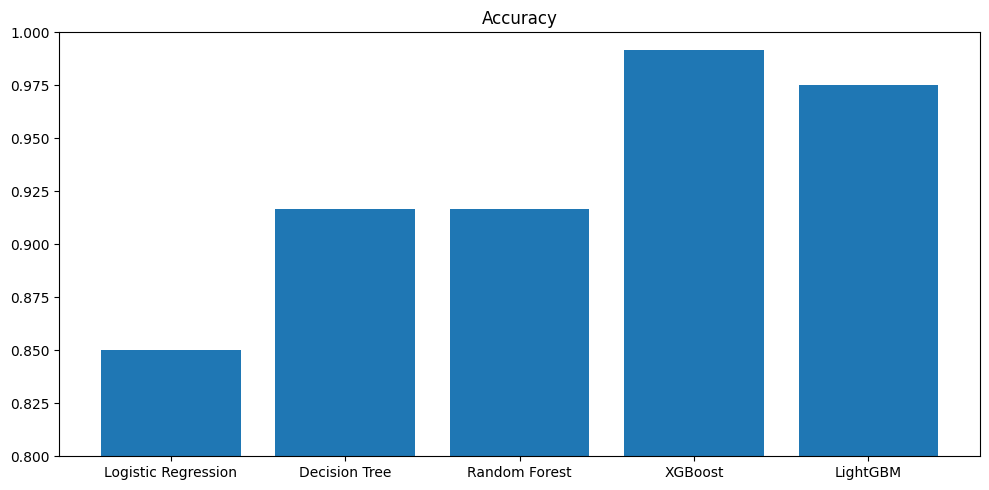

In [264]:
plt.figure(figsize=(10, 5))
plt.ylim(0.8, 1.0)
plt.bar(accuracy.keys(), accuracy.values())
plt.title('Accuracy')

plt.tight_layout()
plt.show()

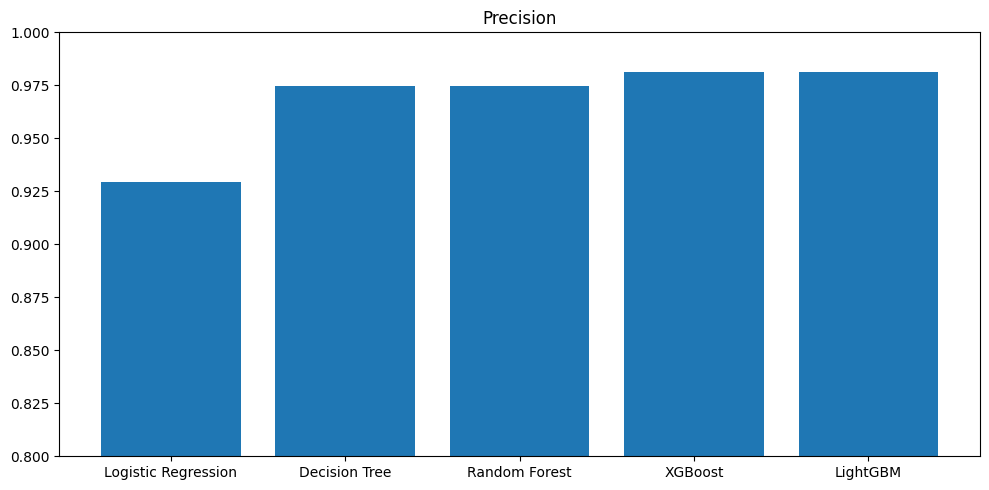

In [248]:
plt.figure(figsize=(10, 5))
plt.ylim(0.8, 1.0)
plt.bar(precision.keys(), precision.values())
plt.title('Precision')

plt.tight_layout()
plt.show()

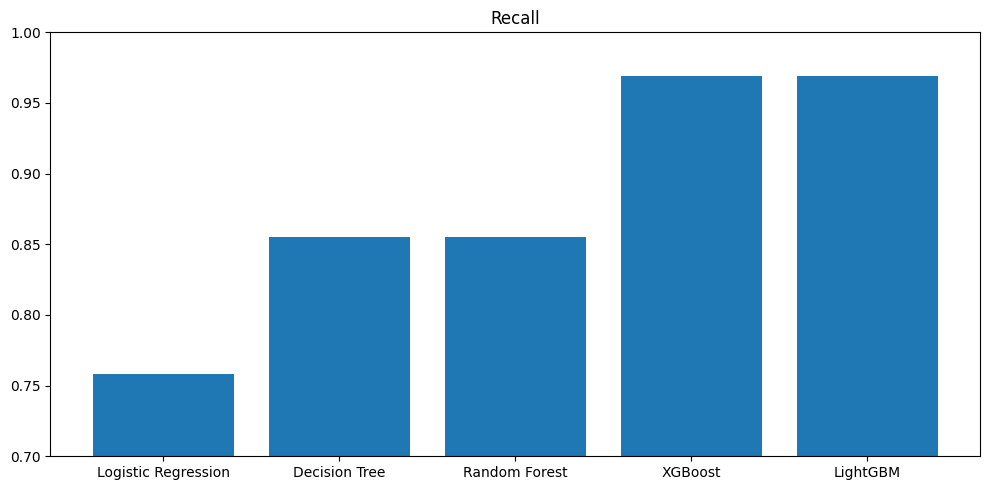

In [247]:
plt.figure(figsize=(10, 5))
plt.ylim(0.7, 1.0)
plt.bar(recal.keys(), recal.values())
plt.title('Recall')
plt.tight_layout()
plt.show()

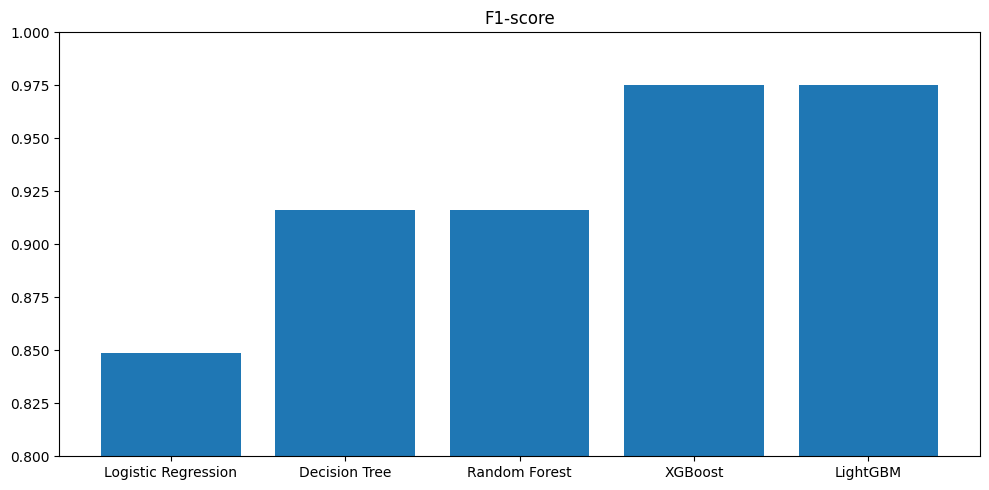

In [246]:
plt.figure(figsize=(10, 5))
plt.ylim(0.8, 1.0)
plt.bar(f1_score.keys(), f1_score.values())
plt.title('F1-score')

plt.tight_layout()
plt.show()